## 1️⃣ Setting up the environment.

In [1]:
import jupyterthemes as jt
from jupyterthemes.stylefx import set_nb_theme
set_nb_theme('monokai')

In [52]:
%%capture --no-display
# I just don't want to show the output of this cell where it's not needed.

# import libraries
!pip install ipython-sql
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

In [53]:
# checking the SQLite version:
print('current_SQLite_Version : ',sqlite3.sqlite_version)

current_SQLite_Version :  3.37.2


## 2️⃣ Creating the DataBase , inserting the values.

In [54]:
# create DataBase called 'faasos'
db_connect = sqlite3.connect('faasos')
# cursors allow us to execute SQL_queries :
cur = db_connect.cursor()

# Drop existing tables
cur.execute('DROP TABLE IF EXISTS drivers')
cur.execute('DROP TABLE IF EXISTS ingredients')
cur.execute('DROP TABLE IF EXISTS rolls')
cur.execute('DROP TABLE IF EXISTS rolls_recipes')
cur.execute('DROP TABLE IF EXISTS driver_orders')
cur.execute('DROP TABLE IF EXISTS customer_orders')

# Commit the changes
db_connect.commit()

In [55]:
# create tables 'drivers','ingredients','rolls','rolls_recipes','driver_orders'&'customer_orders'.
# A] 'drivers' table:
cur.execute('CREATE TABLE if not exists drivers(driver_id integer,reg_date date)')
cur.execute('''INSERT INTO drivers(driver_id,reg_date) 
               VALUES  (1,'01-01-2021'),
                       (2,'01-03-2021'),
                       (3,'01-08-2021'),
                       (4,'01-15-2021');''')
# B] 'ingredients' table:
cur.execute('CREATE TABLE if not exists ingredients(ingredient_id integer,ingredient_name text)')
cur.execute(''' INSERT INTO ingredients(ingredient_id ,ingredient_name) 
                VALUES  (1,'BBQ Chicken'),
                        (2,'Chilli Sauce'),
                        (3,'Chicken'),
                        (4,'Cheese'),
                        (5,'Kebab'),
                        (6,'Mushrooms'),
                        (7,'Onions'),
                        (8,'Egg'),
                        (9,'Peppers'),
                        (10,'schezwan sauce'),
                        (11,'Tomatoes'),
                        (12,'Tomato Sauce');''')

# C] 'rolls' table :
cur.execute('CREATE TABLE if not exists rolls(roll_id integer,roll_name text)')
cur.execute(''' INSERT INTO rolls(roll_id ,roll_name)
                VALUES (1,'Non Veg Roll'),
                       (2,'Veg Roll');''')

# D] 'rolls_recipes' table :
cur.execute('CREATE TABLE if not exists rolls_recipes(roll_id integer,ingredients text)')
cur.execute(''' INSERT INTO rolls_recipes(roll_id ,ingredients) 
                VALUES (1,'1,2,3,4,5,6,8,10'),
                       (2,'4,6,7,9,11,12');''')

# E] 'driver_orders' table :
cur.execute('''CREATE TABLE if not exists driver_orders(order_id integer,driver_id integer,pickup_time datetime,distance VARCHAR(7),duration VARCHAR(10),cancellation VARCHAR(23))''')
cur.execute(''' INSERT INTO driver_orders(order_id,driver_id,pickup_time,distance,duration,cancellation) 
                VALUES  (1,1,'01-01-2021 18:15:34','20km','32 minutes',''),
                        (2,1,'01-01-2021 19:10:54','20km','27 minutes',''),
                        (3,1,'01-03-2021 00:12:37','13.4km','20 mins','NaN'),
                        (4,2,'01-04-2021 13:53:03','23.4','40','NaN'),
                        (5,3,'01-08-2021 21:10:57','10','15','NaN'),
                        (6,3,null,null,null,'Cancellation'),
                        (7,2,'01-08-2021 21:30:45','25km','25mins',null),
                        (8,2,'01-10-2021 00:15:02','23.4 km','15 minute',null),
                        (9,2,null,null,null,'Customer Cancellation'),
                        (10,1,'01-11-2021 18:50:20','10km','10minutes',null);''')

# F] 'customer_orders' table :
cur.execute('CREATE TABLE if not exists customer_orders(order_id integer,customer_id integer,roll_id integer,not_include_items VARCHAR(4),extra_items_included VARCHAR(4),order_date datetime)')
cur.execute(''' INSERT INTO customer_orders(order_id,customer_id,roll_id,not_include_items,extra_items_included,order_date)                                                                           
                values  (1,101,1,'','','01-01-2021  18:05:02'),
                        (2,101,1,'','','01-01-2021 19:00:52'),
                        (3,102,1,'','','01-02-2021 23:51:23'),
                        (3,102,2,'','NaN','01-02-2021 23:51:23'),
                        (4,103,1,'4','','01-04-2021 13:23:46'),
                        (4,103,1,'4','','01-04-2021 13:23:46'),
                        (4,103,2,'4','','01-04-2021 13:23:46'),
                        (5,104,1,null,'1','01-08-2021 21:00:29'),
                        (6,101,2,null,null,'01-08-2021 21:03:13'),
                        (7,105,2,null,'1','01-08-2021 21:20:29'),
                        (8,102,1,null,null,'01-09-2021 23:54:33'),
                        (9,103,1,'4','1,5','01-10-2021 11:22:59'),
                        (10,104,1,null,null,'01-11-2021 18:34:49'),
                        (10,104,1,'2,6','1,4','01-11-2021 18:34:49');''');

# Commit the changes in the 'faasos' database
db_connect.commit()
print("Records inserted in the DataBase which consists of 6 tables:")

Records inserted in the DataBase which consists of 6 tables:


In [56]:
# show all the new tables in the newly created SQL Database.
cur.execute("SELECT name from sqlite_master where type='table' order by name;")
results = cur.fetchall()
results

[('customer_orders',),
 ('driver_orders',),
 ('drivers',),
 ('ingredients',),
 ('rolls',),
 ('rolls_recipes',)]

In [57]:
# create run() function to easily run queries.
def run(query):
    return pd.read_sql_query(query,db_connect)

## 3️⃣ Answering Business Questions.
We can devide these questions into 2 main segments each one targets a particular issue:
- A) Roll metrics
- B) Driver & Customer experience

### A) Roll metrics:
1. **How many rolls were ordered?**
- **How many unique customer orders were made ?**
- **How many successful orders were delivered by each driver?**
- **How many of each type of rolls was delivered?**
- **How many Veg and non-Veg rolls were ordered by each customer?**
- **What was the maximun number of rolls delivered in a single order?**
- **For each customer, how many delivered rolls had at least 1_change and how many had no_change?**
- **How many rolls were delivered that had both exclusions and extras?**
- **What was the total number of rolls ordered for each hour of the day?**
- **What was the number of orders for each day of the week?**

### B)  Driver & Customer experience:
1. **What was the average time in minutes it took for each driver to arrive at faasos HQ to pick up order?**
2. **Is there any relationship between the Num of rolls and how long the order takes to be ready?**
3. **What was the average distance travelled for each customer?**
4. **What was the differnce between the longest and shortest delivery times for all orders?**
5. **What was the average speed for each driver for each delivery and is there  any trend for these values?**
6. **What is the successful delivery percentage for each driver?**

> ### (A.1) How many rolls were ordered ?

In [58]:
q = '''
select count(roll_id) NO_of_rolls
from customer_orders
'''
run(q)

,NO_of_rolls
0,14


> ### (A.2) How many unique customer orders were made ?

In [59]:
# (2) How many unique customer orders were made ?
q = '''
select count(distinct(customer_id)) No_of_customers
from customer_orders
'''
run(q)

,No_of_customers
0,5


> ### (A.3) How many successful orders were delivered by each driver ?

In [60]:
# keep in mind that there are 2 kinds of cancellation by [the driver\the customer] which are represented in
# [Cancellation , Customer Cancellation].

q = '''
select driver_id , count(driver_id) No_successful_orders
from driver_orders
where cancellation not in ('Cancellation' , 'Customer Cancellation')
group by driver_id
'''
run(q)

,driver_id,No_successful_orders
0,1,3
1,2,1
2,3,1


> ### (A.4) How many of each type of rolls was successfully delivered ?

In [61]:
q = '''
select roll_id  ,count(roll_id) No_of_rolls
from
    (select * , case when cancellation in ('Cancellation' , 'Customer Cancellation') then 'cancelled' else 'not_cancelled' end as Cancellation_status    
    from driver_orders
    where Cancellation_status not in ('cancelled' ))  a
inner join (customer_orders) b
on a.order_id = b.order_id
group by roll_id
'''
run(q)

,roll_id,No_of_rolls
0,1,9
1,2,3


1. The problem with the below query that it gives us 5 data_points where it should give us 8; because we have only 2 cancelled orders.Where it can recognize ['',NaN] & it can't do so with [None].
```
select *
from driver_orders
where cancellation not in ('Cancellation' , 'Customer Cancellation')
```
Query_result :
![1](1.png)
2.  So, we have to do some Data-Cleaning to answer this question. We created new_column called 'cancellation_status' based on the value in 'cancellation' column. Then we filtered the data based on the value of new_col to get the successfully delivered orders.
```
select * , case when cancellation in ('Cancellation' , 'Customer Cancellation') then 'cancelled' else 'not_cancelled' end as Cancellation_status    
from driver_orders
```
Query_result :
![2](2.png)

> ### (A.5) How many Veg and non-Veg rolls were ordered by each customer ?


In [62]:
q = '''
select a.customer_id,b.roll_name , count(a.order_id) No_of_orders
from (customer_orders) a
inner join (rolls) b
on a.roll_id = b.roll_id
group by b.roll_name, a.customer_id
'''
run(q)

,customer_id,roll_name,No_of_orders
0,101,Non Veg Roll,2
1,102,Non Veg Roll,2
2,103,Non Veg Roll,3
3,104,Non Veg Roll,3
4,101,Veg Roll,1
5,102,Veg Roll,1
6,103,Veg Roll,1
7,105,Veg Roll,1


> ### (A.6) What was the maximun number of rolls delivered in a single order ?

In [63]:
q = '''
select c.order_id , max(c.No_of_rolls) max_no_of_rolls
from
    (select a.order_id , count(b.roll_id) No_of_rolls
    from
        (select *
        from 
            (select * , case when cancellation in ('cancellation' , 'Customer Cancellation') then 'cancelled' else 'not_cancelled' end as cancellation_status
            from driver_orders) 
        where cancellation_status not in ('cancelled')) a
    inner join (customer_orders) b
    on a.order_id = b.order_id
    group by a.order_id) c
'''
run(q)

,order_id,max_no_of_rolls
0,4,3


We can extract the maximum number using the `Rank()` function but I don't prefer it because one more sub-query will be added:
```
select *
from
    (select c.order_id ,c.No_of_rolls ,rank() over(order by c.No_of_rolls desc) rank
    from
        (select a.order_id , count(b.roll_id) No_of_rolls
        from
            (select *
            from 
                (select * , case when cancellation in ('cancellation' , 'Customer Cancellation') then 'cancelled' else 'not_cancelled' end as cancellation_status
                from driver_orders) 
            where cancellation_status not in ('cancelled')) a
        inner join (customer_orders) b
        on a.order_id = b.order_id
        group by a.order_id) c) d
where rank = 1
```
Query_result :
![3](3.png)

>### (A.7) For each customer, how many delivered rolls had at least 1_change and how many had no_change ?

In [64]:
# 1sr : we have to create a temporary table that has null & NaN values represented in a pratical way to be     
# used in  further analysis.
cur.execute('''
create temp table  if not exists temp_customer_orders as
select order_id , customer_id , roll_id,
       case when not_include_items is Null or not_include_items = '' or not_include_items = 'NaN' then '0' else not_include_items end as new_not_include_items,                     
       case when extra_items_included is Null or extra_items_included = '' or extra_items_included = 'NaN' then '0' else extra_items_included end as new_extra_items_included
from customer_orders
''')

# check:
q ='''
select *
from temp_customer_orders
'''
run(q).tail(3)

,order_id,customer_id,roll_id,new_not_include_items,new_extra_items_included
11,9,103,1,4,"1,5"
12,10,104,1,0,0
13,10,104,1,"2,6","1,4"


In [65]:
# 2nd :Solve the same problem of inconsistant values representation at 'driver_orders' table:
cur.execute('''
create temp table  if not exists temp_driver_orders as
select order_id , driver_id , pickup_time,pickup_time,duration,
       case when cancellation in ('Cancellation' , 'Customer Cancellation') then 0 else 1 end as  new_cancellation                    
from driver_orders
''')

# check:
q ='''
select *
from temp_driver_orders
'''
run(q).tail(3)

,order_id,driver_id,pickup_time,pickup_time:1,duration,new_cancellation
7,8,2,01-10-2021 00:15:02,01-10-2021 00:15:02,15 minute,1
8,9,2,None,None,None,0
9,10,1,01-11-2021 18:50:20,01-11-2021 18:50:20,10minutes,1


In [66]:
# 3th :Get all successfully delivered rolls.
# then, create a new col 'change_or_not':

q = '''
select a.customer_id ,a.change_or_not, count(a.order_id) No_of_orders
from
    (select *, case when new_not_include_items = '0' and new_not_include_items = '0' then 'no_change' else 'change' end as change_or_not
    from
        (select *
        from temp_customer_orders
        where order_id in (select order_id
                            from temp_driver_orders
                            where new_cancellation = 1))) a
group by a.change_or_not,a.customer_id
'''
run(q)

,customer_id,change_or_not,No_of_orders
0,103,change,3
1,104,change,1
2,101,no_change,2
3,102,no_change,3
4,104,no_change,2
5,105,no_change,1


> ### (A.8) How many rolls were delivered that had both exclusions and extras ?

In [67]:
q = '''
select include_or_exclude , count(include_or_exclude)
from 
    (select * , case when new_not_include_items != "0" and new_extra_items_included != '0' then 'both' else 'either of them' end as include_or_exclude                              
    from
        (select *
        from temp_customer_orders
        where order_id in (select order_id
                            from temp_driver_orders
                            where new_cancellation = 1)))
group by include_or_exclude
'''
run(q)

,include_or_exclude,count(include_or_exclude)
0,both,1
1,either of them,11


> ### (A.9) what was the total number of rolls ordered for each hour of the day ?

**VERY important Notte :**

```
# to get data in this format '%Y-%m-%d %H:%M:%S'
datetime(substr(order_date,7,4) || '-' || substr(order_date,4,2) || '-' || substr(order_date,1,2) || substr(order_date,11)) real_order_date
```
keep in mind that the dates created in the data base in this format [year-day-month hour:min:sec]
so you have to shift `substr(order_date,4,2)` with this part `substr(order_date,1,2)` while executing the query to match how the dates are formated in our `faasos DataBase`

In [68]:
q = '''
select b.hour_range , count(b.roll_id) No_of_rolls
from
    (select * , strftime('%H' ,a.real_order_date) ||'-'|| cast(strftime('%H' ,a.real_order_date) + 1 as text) as hour_range  
    from
        (select * , datetime(substr(order_date,7,4) || '-' || substr(order_date,1,2) || '-' || substr(order_date,4,2) || substr(order_date,11)) real_order_date      
        from customer_orders) a) b  
group by b.hour_range 
order by No_of_rolls desc
'''
run(q)

,hour_range,No_of_rolls
0,23-24,3
1,21-22,3
2,18-19,3
3,13-14,3
4,19-20,1
5,11-12,1


> ### (A.10) what was the number of orders for each day of the week ?

**CKECK the Note above in Q9 :**
```
select
  case cast (strftime('%w', '2022-01-01') as integer)
  when 0 then 'Sunday'
  when 1 then 'Monday'
  when 2 then 'Tuesday'
  when 3 then 'Wednesday'
  when 4 then 'Thursday'
  when 5 then 'Friday'
  else 'Saturday' end as weekday
```


In [69]:
q = '''
select c.weekday , count(distinct(c.order_id)) No_of_orders
from
    (select *,case cast(b.No_of_day_of_week as int) when 0 then 'Sunday' when 1 then 'Monday' when 2 then 'Tuesday' when 3 then 'Wednesday' when 4 then 'Thursday' when 5 then 'Friday' else 'Saturday' end as weekday                                                                        
    from
        (select * ,strftime('%d',a.real_order_date) No_of_day_from_date , strftime('%w',a.real_order_date) No_of_day_of_week                                        
        from
            (select * , datetime(substr(order_date,7,4)||'-'||substr(order_date,1,2)||'-'||substr(order_date,4,2)|| substr(order_date,11)) real_order_date                          
            from customer_orders) a) b) c
group by c.weekday
'''
run(q)

,weekday,No_of_orders
0,Friday,5
1,Monday,2
2,Saturday,2
3,Sunday,1


### B)  Driver & Customer experience:
1. **What was the average time in minutes it took for each driver to arrive at faasos HQ to pick up order?**
2. **Is there any relationship between the Num of rolls and how long the order takes to be ready?**
3. **What was the average distance travelled for each customer?**
4. **What was the differnce between the longest and shortest delivery times for all orders?**
5. **What was the average speed for each driver for each delivery and is there  any trend for these values?**
6. **What is the successful delivery percentage for each driver?**

> ### (B.1) What was the average time in minutes it took for each driver to arrive at faasos restaurant to pick up order ?

- 1st: We have to join the table of 'customer_orders' where the 'order_date'-col at which represents the time when a customer makes the order. With 'driver_orders' table that has 'pickup_time' col which represents the time when the driver picks up the order from faasos' restaurant to deliver it to the customer.

In [70]:
q = '''  
select driver_id ,
       count(order_id) No_orders ,
       sum(initiate_vs_pickup_diff) total_time ,
       avg(initiate_vs_pickup_diff) avg_time
from
    (select *
    from 
        (select *, row_number() over(partition by d.order_id) rank
        from 
            (select *, (strftime('%s',c.real_pickup_time) - strftime('%s',c.real_order_date))/60.0  initiate_vs_pickup_diff
            from
                (select a.order_id ,b.driver_id ,datetime(substr(a.order_date,7,4) || '-' || substr(a.order_date,1,2) || '-' || substr(a.order_date,4,2) || substr(a.order_date,11)) real_order_date,datetime(substr(b.pickup_time,7,4) || '-' || substr(b.pickup_time,1,2) || '-' || substr(b.pickup_time,4,2) || substr(b.pickup_time,11)) real_pickup_time
                from (customer_orders) a
                inner join (driver_orders) b
                on a.order_id = b.order_id
                where b.pickup_time is not null) c) d) e
    where e.rank = 1) f
group by driver_id
''' 
run(q) 

,driver_id,No_orders,total_time,avg_time
0,1,4,57.316667,14.329167
1,2,3,60.033333,20.011111
2,3,1,10.466667,10.466667


> ### (B.2) Is there any relationship between the Num of rolls and how long the order takes to be ready?

In [71]:
q = '''
select 
    order_id, 
    count(roll_id) Num_of_rolls, 
    real_order_date, 
    real_pickup_time,
    (strftime('%s', real_pickup_time) - strftime('%s', real_order_date)) / 60.0 AS preparing_duration_mins
from 
    (select a.order_id ,a.roll_id ,b.driver_id ,datetime(substr(a.order_date,7,4) || '-' || substr(a.order_date,1,2) || '-' || substr(a.order_date,4,2) || substr(a.order_date,11)) real_order_date,datetime(substr(b.pickup_time,7,4) || '-' || substr(b.pickup_time,1,2) || '-' || substr(b.pickup_time,4,2) || substr(b.pickup_time,11)) real_pickup_time
    from (customer_orders) a
    inner join (driver_orders) b
    on a.order_id = b.order_id
    where b.pickup_time is not null) c

group by order_id
'''
run(q)

,order_id,Num_of_rolls,real_order_date,real_pickup_time,preparing_duration_mins
0,1,1,2021-01-01 18:05:02,2021-01-01 18:15:34,10.533333
1,2,1,2021-01-01 19:00:52,2021-01-01 19:10:54,10.033333
2,3,2,2021-01-02 23:51:23,2021-01-03 00:12:37,21.233333
3,4,3,2021-01-04 13:23:46,2021-01-04 13:53:03,29.283333
4,5,1,2021-01-08 21:00:29,2021-01-08 21:10:57,10.466667
5,7,1,2021-01-08 21:20:29,2021-01-08 21:30:45,10.266667
6,8,1,2021-01-09 23:54:33,2021-01-10 00:15:02,20.483333
7,10,2,2021-01-11 18:34:49,2021-01-11 18:50:20,15.516667


Correlation coefficient between Num_of_rolls and preparing_duration_mins: 0.8356841091611147


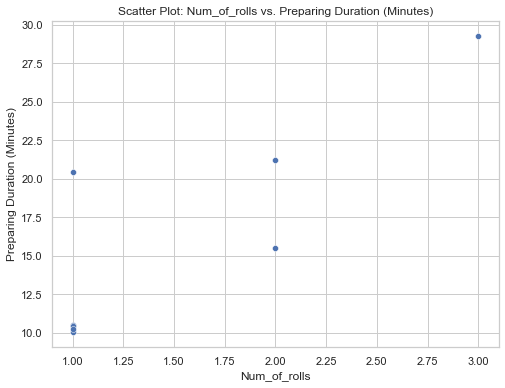

In [72]:
# 1. Test if there is a correlation between the num. of rolls in one order and the duration it takes to be ready:
df = run(q)
correlation = np.corrcoef(df['Num_of_rolls'], df['preparing_duration_mins'])[0, 1]
print(f"Correlation coefficient between Num_of_rolls and preparing_duration_mins: {correlation}")

# 2. Create a scatter plot
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="Num_of_rolls", y="preparing_duration_mins")
plt.title("Scatter Plot: Num_of_rolls vs. Preparing Duration (Minutes)")
plt.xlabel("Num_of_rolls")
plt.ylabel("Preparing Duration (Minutes)");

In this query:
- strftime('%s', real_pickup_time) converts the real_pickup_time to the number of seconds since the Unix epoch.
- strftime('%s', real_order_date) converts the real_order_date to the number of seconds since the Unix epoch.
- Subtracting the two values gives you the difference in seconds.
- Dividing by 60 converts the duration from seconds to minutes.

This query will return a result set that includes the order_id, roll_id, driver_id, real_order_date, real_pickup_time, and duration_minutes columns, where duration_minutes is the duration in minutes.

> ### (B.3) What was the average distance travelled for each customer?

In [133]:
q = '''
select customer_id , avg(clear_distance) average_distance
from
    (select *
        from 
            (select *, row_number() over(partition by d.order_id) rank
            from 
                (select *,
                        (strftime('%s',c.real_pickup_time) - strftime('%s',c.real_order_date))/60.0  initiate_vs_pickup_diff
                from
                    (select a.order_id, a.customer_id, a.roll_id,
                            cast(trim(replace(lower(b.distance), 'km' , ''))as float) clear_distance,
                            datetime(substr(a.order_date,7,4) || '-' || substr(a.order_date,1,2) || '-' || substr(a.order_date,4,2) || substr(a.order_date,11)) real_order_date,
                            datetime(substr(b.pickup_time,7,4) || '-' || substr(b.pickup_time,1,2) || '-' || substr(b.pickup_time,4,2) || substr(b.pickup_time,11)) real_pickup_time
                    from (customer_orders) a 
                    inner join (driver_orders) b
                    on a.order_id = b.order_id
                    where b.pickup_time is not null) c) d) e
        where e.rank = 1) f

group by customer_id
'''
run(q)

,customer_id,average_distance
0,101,20.0
1,102,18.4
2,103,23.4
3,104,10.0
4,105,25.0


> ### (B.4) What was the differnce between the longest and shortest delivery times for all orders?

In [102]:
q='''
SELECT min(duration_mins) shortest_duration,
       max(duration_mins) longest_duration,
       max(duration_mins) - min(duration_mins) diff
FROM
    (SELECT duration ,
           CASE 
           WHEN duration LIKE '%min%' THEN CAST(SUBSTR(duration, 1, INSTR(duration ,'m')-1) AS int)
           ELSE CAST(duration AS int)
           END AS duration_mins
    FROM driver_orders
    WHERE duration is not null) a
'''
run(q)

,shortest_duration,longest_duration,diff
0,10,40,30


> ### (B.5) What was the average speed for each driver for each delivery and do you notice any trend for these values?

In [153]:
q='''
select order_id , count(roll_id) Num_rolls
from customer_orders
group by order_id
'''
run(q)

,order_id,Num_rolls
0,1,1
1,2,1
2,3,2
3,4,3
4,5,1
5,6,1
6,7,1
7,8,1
8,9,1
9,10,2


In [154]:
q = '''
SELECT c.order_id, c.driver_id, d.Num_rolls, c.avg_speed_km_min
FROM
    (SELECT driver_id , order_id , AVG(speed_km_min) avg_speed_km_min
     FROM
        (SELECT *, distance_km/duration_mins speed_km_min
         FROM
            (SELECT order_id, driver_id, CAST(trim(replace(lower(distance) , 'km','')) AS float) distance_km ,
                    CASE
                    WHEN duration like '%min%' then CAST(SUBSTR(duration ,1 ,INSTR(duration,'m')-1) AS float)
                    ELSE CAST(duration AS float)
                    END as duration_mins
             FROM driver_orders
             WHERE duration or distance is not null) a) b
     GROUP BY driver_id , order_id) c
     
INNER JOIN (select order_id , count(roll_id) Num_rolls
            from customer_orders
            group by order_id) d
ON c.order_id = d.order_id
'''
run(q)

,order_id,driver_id,Num_rolls,avg_speed_km_min
0,1,1,1,0.625000
1,2,1,1,0.740741
2,3,1,2,0.670000
3,10,1,2,1.000000
4,4,2,3,0.585000
5,7,2,1,1.000000
6,8,2,1,1.560000
7,5,3,1,0.666667


Correlation coefficient between Num_rolls and avg_speed_km_min: -0.33753798021918613


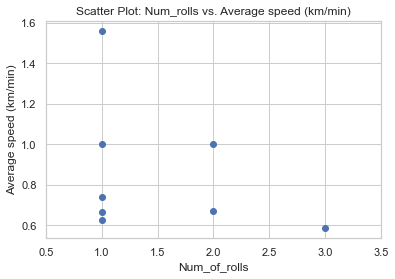

In [165]:
# 1. Test if there is a correlation between the num. of rolls in one order and the avg_speed_km_min of driver:
df = run(q)
correlation = np.corrcoef(df['Num_rolls'], df['avg_speed_km_min'])[0, 1]
print(f"Correlation coefficient between Num_rolls and avg_speed_km_min: {correlation}")

# 2. Create a scatter plot
plt.scatter(data=df, x="Num_rolls", y="avg_speed_km_min")
plt.title("Scatter Plot: Num_rolls vs. Average speed (km/min)")
plt.xlabel("Num_of_rolls")
plt.xlim(0.5,3.5)
plt.ylabel("Average speed (km/min)");

> ### (B.6) What is the successful delivery percentage for each driver?

In [192]:
q='''
SELECT driver_id , COUNT(driver_id) Total_delivery_rides , sum(successful) Num_successful_rides,
       AVG(successful)*100 successful_delivery_percent
FROM
    (SELECT driver_id,
           CASE
           WHEN LOWER(cancellation) LIKE '%cancel%' THEN 0 ELSE 1
           END AS successful
     FROM driver_orders) a
GROUP BY driver_id
'''
run(q)

,driver_id,Total_delivery_rides,Num_successful_rides,successful_delivery_percent
0,1,4,4,100.0
1,2,4,3,75.0
2,3,2,1,50.0


## 0️⃣ Displaying all the tables to 'Think before Coding'.

In [75]:
q = '''
select *
from customer_orders
'''
run(q)

,order_id,customer_id,roll_id,not_include_items,extra_items_included,order_date
0,1,101,1,,,01-01-2021 18:05:02
1,2,101,1,,,01-01-2021 19:00:52
2,3,102,1,,,01-02-2021 23:51:23
3,3,102,2,,NaN,01-02-2021 23:51:23
4,4,103,1,4,,01-04-2021 13:23:46
5,4,103,1,4,,01-04-2021 13:23:46
6,4,103,2,4,,01-04-2021 13:23:46
7,5,104,1,None,1,01-08-2021 21:00:29
8,6,101,2,None,None,01-08-2021 21:03:13
9,7,105,2,None,1,01-08-2021 21:20:29


In [76]:
q = '''
select *
from driver_orders
'''
run(q)

,order_id,driver_id,pickup_time,distance,duration,cancellation
0,1,1,01-01-2021 18:15:34,20km,32 minutes,
1,2,1,01-01-2021 19:10:54,20km,27 minutes,
2,3,1,01-03-2021 00:12:37,13.4km,20 mins,NaN
3,4,2,01-04-2021 13:53:03,23.4,40,NaN
4,5,3,01-08-2021 21:10:57,10,15,NaN
5,6,3,None,None,None,Cancellation
6,7,2,01-08-2021 21:30:45,25km,25mins,None
7,8,2,01-10-2021 00:15:02,23.4 km,15 minute,None
8,9,2,None,None,None,Customer Cancellation
9,10,1,01-11-2021 18:50:20,10km,10minutes,None


In [77]:
q = '''
select *
from drivers
'''
run(q)

,driver_id,reg_date
0,1,01-01-2021
1,2,01-03-2021
2,3,01-08-2021
3,4,01-15-2021


In [78]:
q = '''
select *
from ingredients
'''
run(q)

,ingredient_id,ingredient_name
0,1,BBQ Chicken
1,2,Chilli Sauce
2,3,Chicken
3,4,Cheese
4,5,Kebab
5,6,Mushrooms
6,7,Onions
7,8,Egg
8,9,Peppers
9,10,schezwan sauce


In [79]:
q = '''
select *
from rolls
'''
run(q)

,roll_id,roll_name
0,1,Non Veg Roll
1,2,Veg Roll


In [80]:
q = '''
select *
from rolls_recipes
'''
run(q)

,roll_id,ingredients
0,1,"1,2,3,4,5,6,8,10"
1,2,"4,6,7,9,11,12"


### Links that helped me:
- [SQLite Forum](https://sqlite.org/forum/info/74ebbe49fddb61ef)
- [Group timestamp by hour SQLite](https://stackoverflow.com/questions/51441099/group-timestamp-by-hour-sqlite)
- [How to Concatenate Strings in SQLite](https://database.guide/how-to-concatenate-strings-in-sqlite/)
- [How to Get Day Names in SQLite](https://learnsql.com/cookbook/how-to-get-day-names-in-sqlite/#:~:text=How%20to%20Get%20Day%20Names%20in%20SQLite%201,and%20CAST%20on%20a%20strftime%20%28%29%20result.%20)
- [Difference between 2 dates in SQLite](https://stackoverflow.com/questions/289680/difference-between-2-dates-in-sqlite)